In [1]:
import numpy as np
import skimage.external.tifffile as tiff
from skimage.filters import threshold_otsu, gaussian, sobel
from skimage.morphology import watershed
from skimage import measure, draw
from scipy import ndimage as ndi
from scipy import optimize
import matplotlib.pyplot as plt
from intersection import calcIntersections

In [4]:
%matplotlib inline

In [5]:
testfile = "img/test_3balls.tif"
with tiff.TiffFile(testfile) as tif:
    img = tif.asarray()

In [6]:
markers = np.zeros_like(img)
markers[img < 100] = 1
markers[img > 100] = 2
elevation_map = sobel(img)
segmentation = watershed(elevation_map, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1)

props2 <class 'tuple'>
props <class 'tuple'>
props2 <class 'tuple'>
props <class 'tuple'>
props2 <class 'tuple'>
props <class 'tuple'>


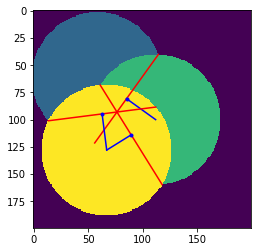

In [8]:
labeled_nuclei, _ = ndi.label(segmentation)
regions = measure.regionprops(labeled_nuclei)
r = 60

fig, ax = plt.subplots()
perim = np.zeros((labeled_nuclei.shape[0], labeled_nuclei.shape[1]))
processed_regions = []
for props in regions:
    y0, x0 = props.centroid
    processed_regions.append(props.centroid)
    
    rr, cc = draw.circle(y0, x0, r, shape=labeled_nuclei.shape)
    perim[rr, cc] = props.label
    for props2 in processed_regions:
        if props2 == props.centroid:
            break
        elif type(props2) is not None:
            print(f'props2 {type(props2)}')
            print(f'props {type(props.centroid)}')
            try: 
                x3, y3, x4, y4 = calcIntersections(props.centroid, props2, r, r)
                xMid = (x3 + x4) / 2
                yMid = (y3 + y4) / 2
                if (x3, x4, y3, y4) is not None:
                     #ax.plot(x3, y3, '.', color='r')
                     #ax.plot(x4, y4, '.', color='r')
                    ax.plot([x3, x4], [y3, y4], color='r')
                    ax.plot(xMid, yMid, '.', color='b')
                    ax.plot([x0, xMid], [y0, yMid], color = 'b')
                    #ax.plot(x0, y0, '.', color = 'green')
            except TypeError:
                pass
        else:
            pass

ax.imshow(perim)


#ax.imshow(labeled_nuclei, cmap = "gray")
plt.show()